Logistic Regression

Task: who is going to leave telecommunications company according to previously collected data.

In [59]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [60]:
file_name = 'dataset/ChurnData.csv'
!wget -nc -O $file_name https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

File `dataset/ChurnData.csv' already there; not retrieving.


In [61]:
df = pd.read_csv(file_name)
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [62]:
df['churn'] = df['churn'].astype('int')
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [63]:
# prepare data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = churn_df.loc[:, churn_df.columns != 'churn']
X = preprocessing.StandardScaler().fit_transform(X)
y = churn_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [64]:
# predict
from sklearn.linear_model import LogisticRegression
# small data set - 'liblinear' is enough 
log_regression = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_hat = log_regression.predict(X_test)

In [65]:
# evaluation
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, y_hat))
print(log_regression.score(X, y))

0.65
0.77


/home/rlekh/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[ 8  7]
 [ 7 18]]


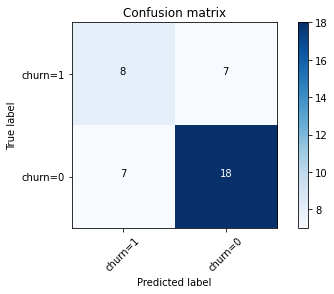

In [84]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

from rhelper import plot_confusion_matrix
rhelper.plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'], normalize=False, title='Confusion matrix')

In [81]:
# 'iris' dataset to compare methods
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=5).fit(X, y)

print(clf.predict(X[45:55]))
print(clf.predict_proba(X[45:55]))

clf.score(X, y)

[0 0 0 0 0 1 1 1 1 1]
[[9.74e-01 2.61e-02 3.99e-08]
 [9.80e-01 1.97e-02 2.52e-08]
 [9.83e-01 1.67e-02 2.01e-08]
 [9.79e-01 2.14e-02 1.86e-08]
 [9.79e-01 2.13e-02 1.92e-08]
 [2.12e-03 8.74e-01 1.24e-01]
 [5.78e-03 8.60e-01 1.34e-01]
 [1.05e-03 7.26e-01 2.73e-01]
 [1.54e-02 9.39e-01 4.54e-02]
 [2.36e-03 8.15e-01 1.83e-01]]


/home/rlekh/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334